### Web Scraping

In [1]:
from bs4 import BeautifulSoup
import requests

In [23]:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

In [24]:
page = requests.get(url)

In [37]:
soup = BeautifulSoup(page.text,"html")


In [42]:
table_needed = soup.find_all('table')

In [43]:
for element in table_needed:
    headers = element.find_all('th')

In [44]:
print(headers)

[<th style="text-align: left;">Party</th>, <th style="text-align:right">Won</th>, <th style="text-align:right">Leading</th>, <th style="text-align:right">Total</th>, <th>Total</th>, <th style="text-align:right">543</th>, <th style="text-align:right">0</th>, <th style="text-align:right">543</th>]


In [45]:
#to get first four
selected_header = [headers[i] for i in [0, 1, 2, 3]]

In [46]:
print(selected_header)

[<th style="text-align: left;">Party</th>, <th style="text-align:right">Won</th>, <th style="text-align:right">Leading</th>, <th style="text-align:right">Total</th>]


In [49]:
fields = [title.text.strip() for title in selected_header]

print(fields)

['Party', 'Won', 'Leading', 'Total']


In [50]:
import pandas as pd

In [52]:
df = pd.DataFrame(columns=fields)

In [53]:
df

,Party,Won,Leading,Total


In [55]:
for element in table_needed:
    column_data = element.find_all('tr')

In [62]:
rows = column_data[1:-1]
data_rows = [[data.text.strip() for data in row.find_all('td')] for row in rows]

df = pd.DataFrame(data_rows, columns=fields) 

In [61]:
df

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22
5,Telugu Desam - TDP,16,0,16
6,Janata Dal (United) - JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
9,Shiv Sena - SHS,7,0,7


In [63]:
df.to_csv('election_results.csv',index=False)

### Analysis of the scraped data

In [87]:
df = pd.read_csv('election_results.csv')

In [70]:
# Top 5 parties by seats won
top_5_parties = total_seats.head(5)
print("\nTop 5 parties by seats won:\n", top_5_parties)



Top 5 parties by seats won:
                                  Party  Won
0         Bharatiya Janata Party - BJP  240
1       Indian National Congress - INC   99
2                 Samajwadi Party - SP   37
3  All India Trinamool Congress - AITC   29
4      Dravida Munnetra Kazhagam - DMK   22


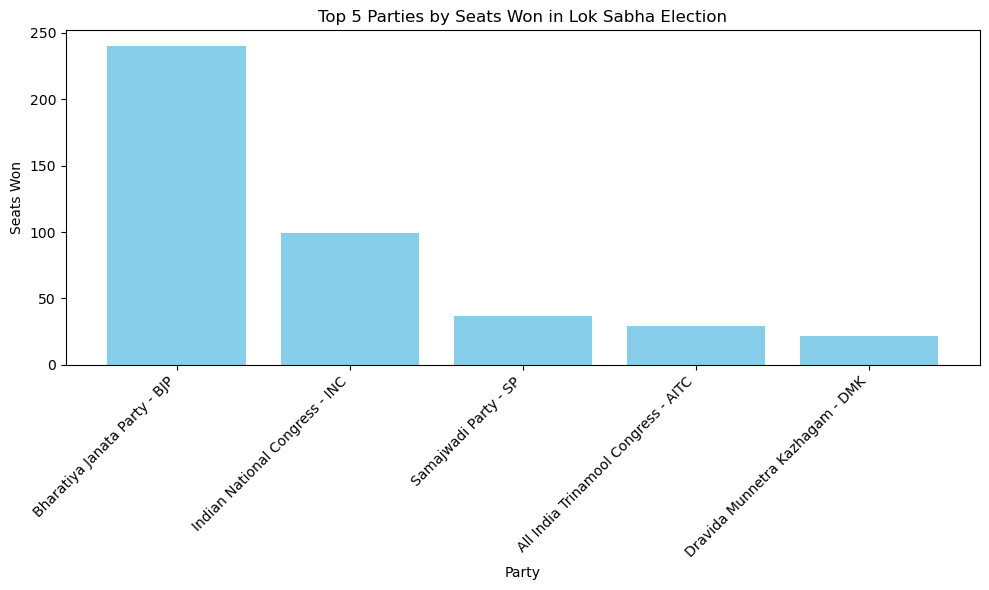

In [99]:
top_5_parties = total_seats.head(5)


plt.figure(figsize=(10, 6))
plt.bar(top_5_parties['Party'], top_5_parties['Won'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Top 5 Parties by Seats Won in Lok Sabha Election')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [88]:
# Parties winning more than 10 seats
parties_more_than_10_seats = df[df['Won'] > 10]
print("\nParties winning more than 10 seats:\n", parties_more_than_10_seats)


Parties winning more than 10 seats:
                                  Party  Won  Leading  Total
0         Bharatiya Janata Party - BJP  240        0    240
1       Indian National Congress - INC   99        0     99
2                 Samajwadi Party - SP   37        0     37
3  All India Trinamool Congress - AITC   29        0     29
4      Dravida Munnetra Kazhagam - DMK   22        0     22
5                   Telugu Desam - TDP   16        0     16
6         Janata Dal  (United) - JD(U)   12        0     12


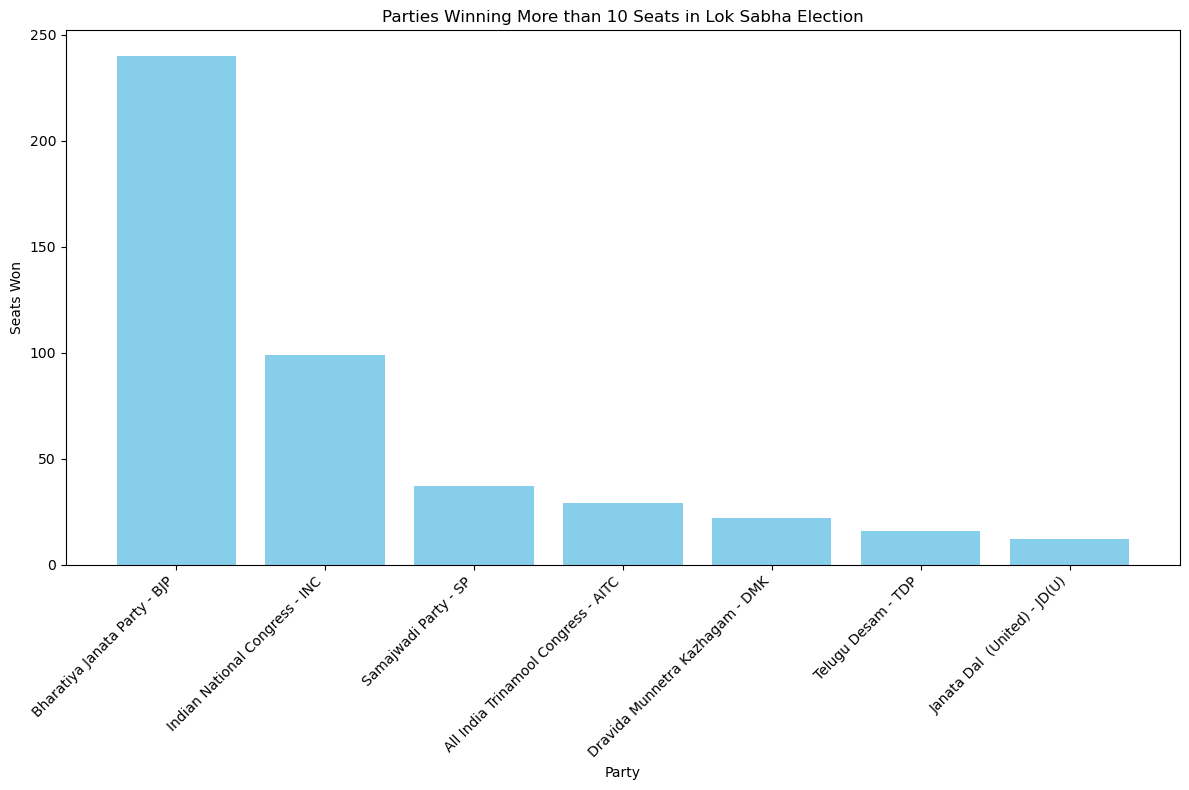

In [101]:
parties_more_than_10_seats = df[df['Won'] > 10]

plt.figure(figsize=(12, 8))
plt.bar(parties_more_than_10_seats['Party'], parties_more_than_10_seats['Won'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.title('Parties Winning More than 10 Seats in Lok Sabha Election')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
# Total seats won by all parties except the top 5
other_parties_seats = df[~df['Party'].isin(top_5_parties['Party'])]['Won'].sum()
print(f"\nTotal seats won by all parties except the top 5: {other_parties_seats}")


Total seats won by all parties except the top 5: 116


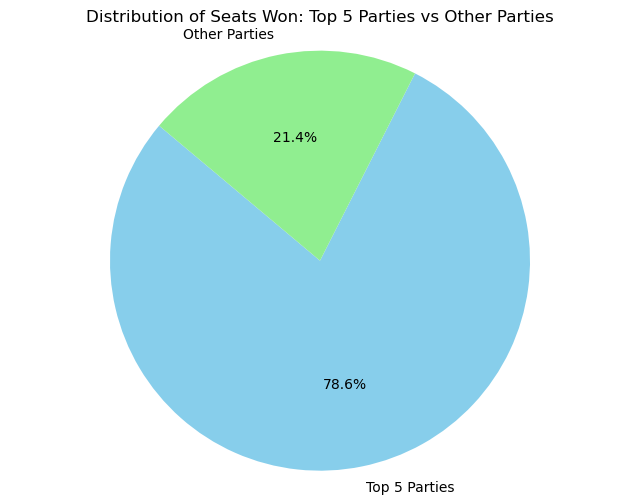

In [100]:
data = pd.DataFrame({
    'Party': ['Top 5 Parties', 'Other Parties'],
    'Seats Won': [top_5_parties['Won'].sum(), other_parties_seats]
})

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['Seats Won'], labels=data['Party'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Seats Won: Top 5 Parties vs Other Parties')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

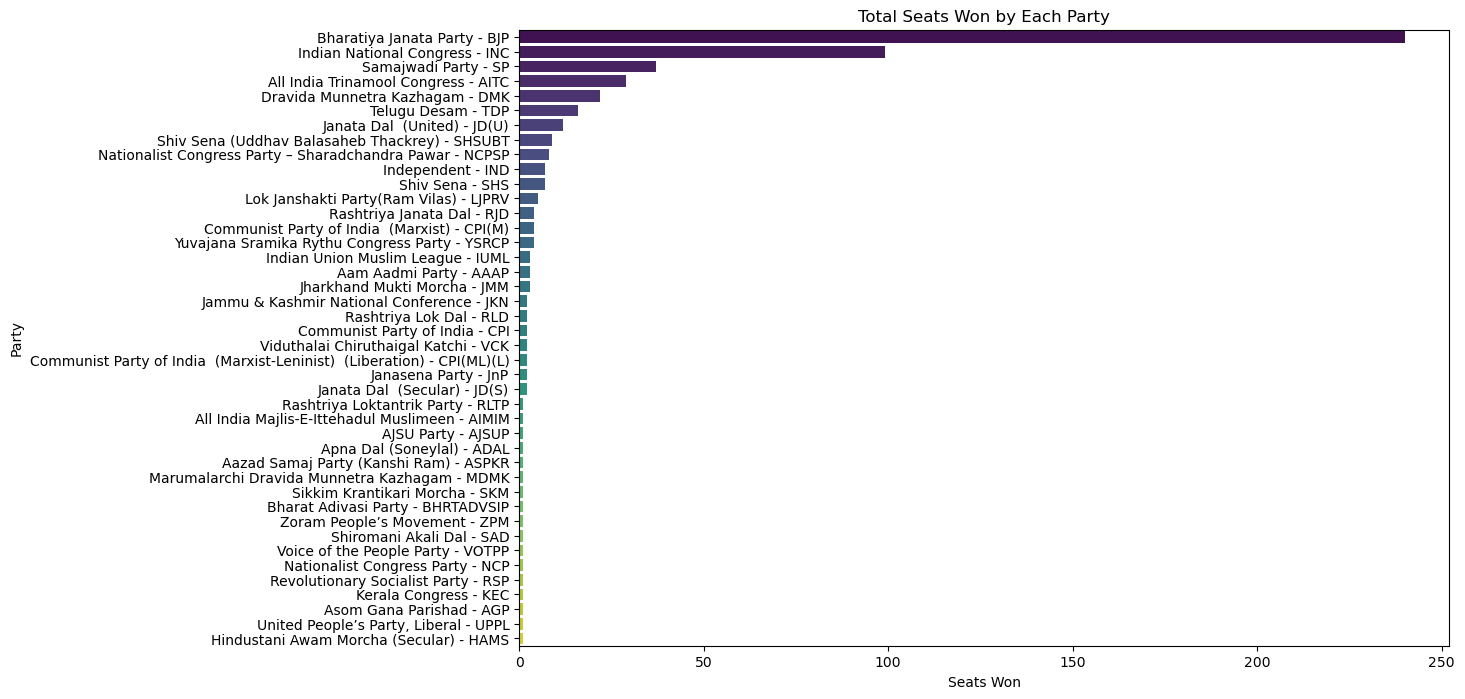

In [90]:
# Plotting the distribution of seats won
plt.figure(figsize=(12, 8))
sns.barplot(x='Won', y='Party', data=total_seats, palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.show()

In [91]:
# Total number of parties participating and winning seats
total_parties = df.shape[0]
print(f"\nTotal number of parties participating: {total_parties}")


Total number of parties participating: 42


In [92]:
# Number of parties winning only one seat
parties_one_seat = df[df['Won'] == 1].shape[0]
print(f"\nNumber of parties winning only one seat: {parties_one_seat}")


Number of parties winning only one seat: 17


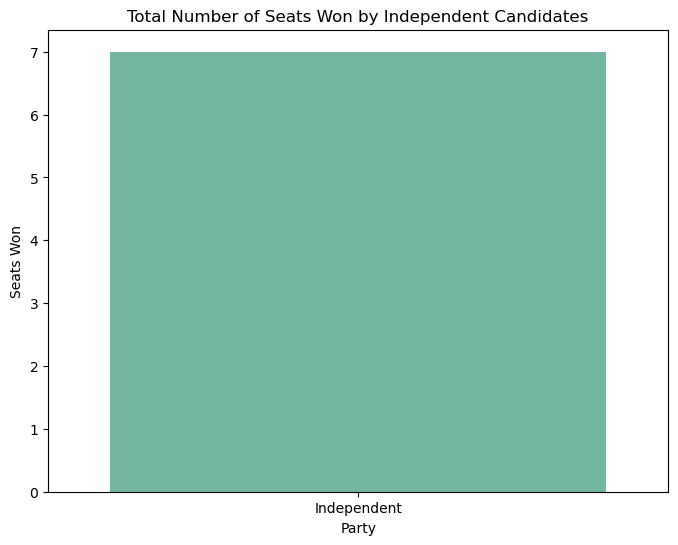


Total number of seats won by independent candidates: 7


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

independent_seats = df[df['Party'] == 'Independent - IND']['Won'].sum()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=['Independent'], y=[independent_seats], palette='Set2')
plt.title('Total Number of Seats Won by Independent Candidates')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.show()


print(f"\nTotal number of seats won by independent candidates: {independent_seats}")



Summary statistics of seats won:
 count     42.000000
mean      12.928571
std       39.466808
min        1.000000
25%        1.000000
50%        2.000000
75%        6.500000
max      240.000000
Name: Won, dtype: float64


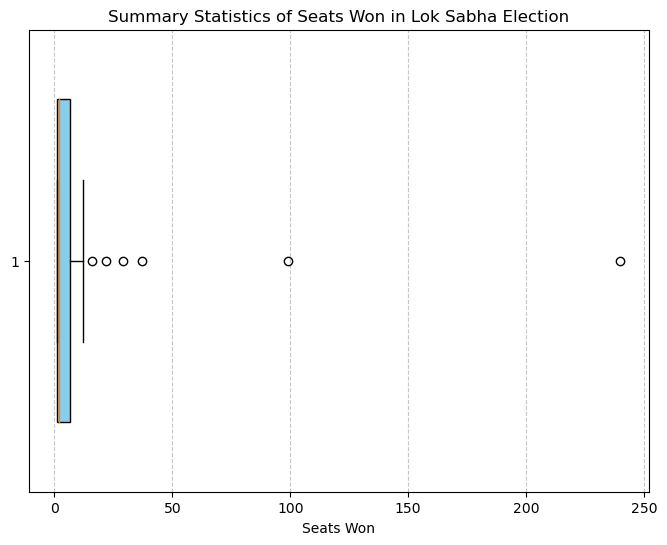

In [102]:
# Summary statistics of seats won
summary_stats = df['Won'].describe()
print("\nSummary statistics of seats won:\n", summary_stats)

plt.figure(figsize=(8, 6))
plt.boxplot(df['Won'], vert=False, patch_artist=True, widths=0.7, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Seats Won')
plt.title('Summary Statistics of Seats Won in Lok Sabha Election')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

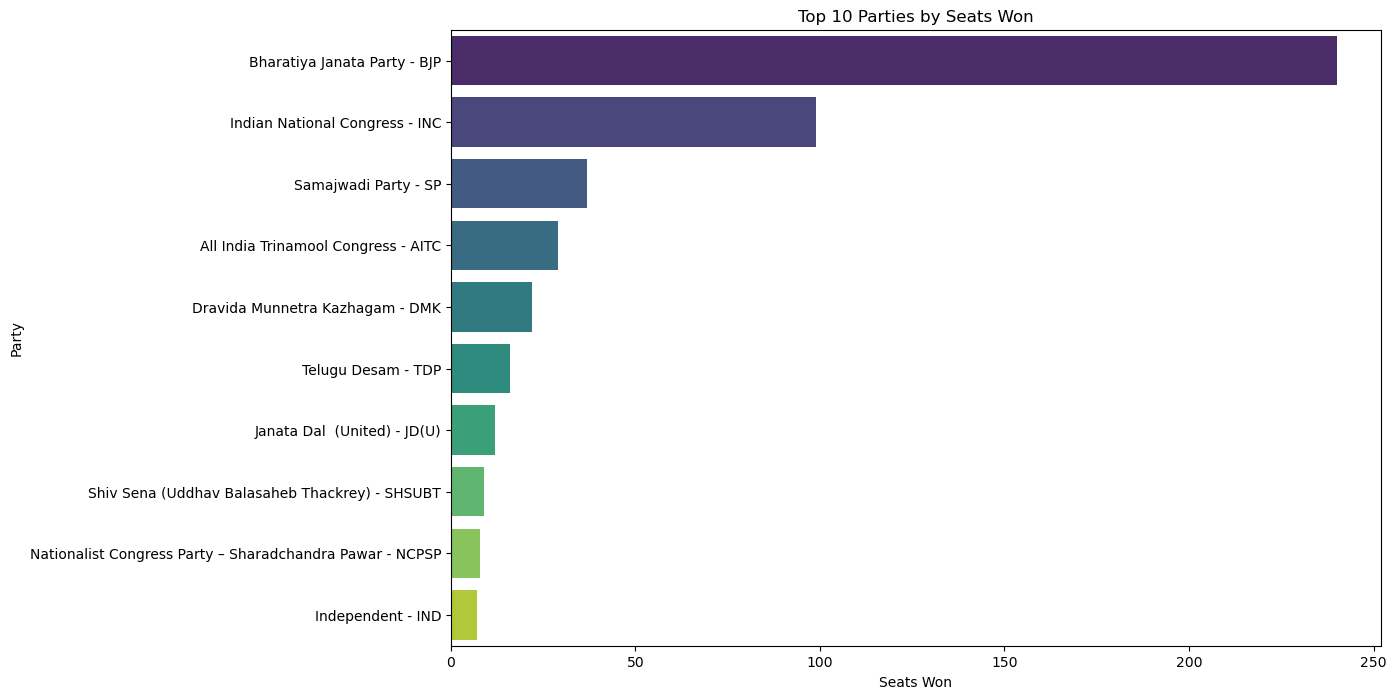

In [80]:
# Top 10 Parties by Seats Won
top_10_parties = total_seats.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Won', y='Party', data=top_10_parties, palette='viridis')
plt.title('Top 10 Parties by Seats Won')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.show()

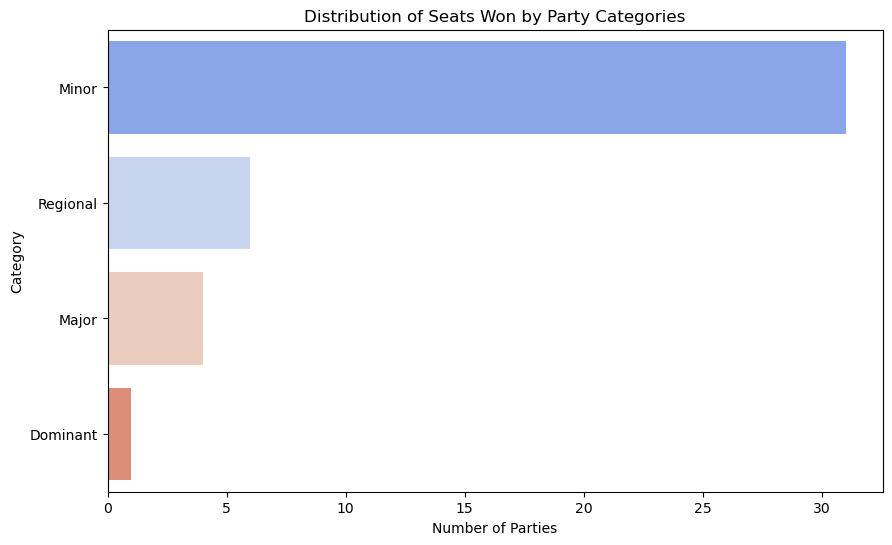

In [81]:
# Distribution of Seats Won by Different Categories of Parties
df['Category'] = pd.cut(df['Won'], bins=[0, 5, 20, 100, df['Won'].max()], labels=['Minor', 'Regional', 'Major', 'Dominant'])
category_distribution = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.values, y=category_distribution.index, palette='coolwarm')
plt.title('Distribution of Seats Won by Party Categories')
plt.xlabel('Number of Parties')
plt.ylabel('Category')
plt.show()

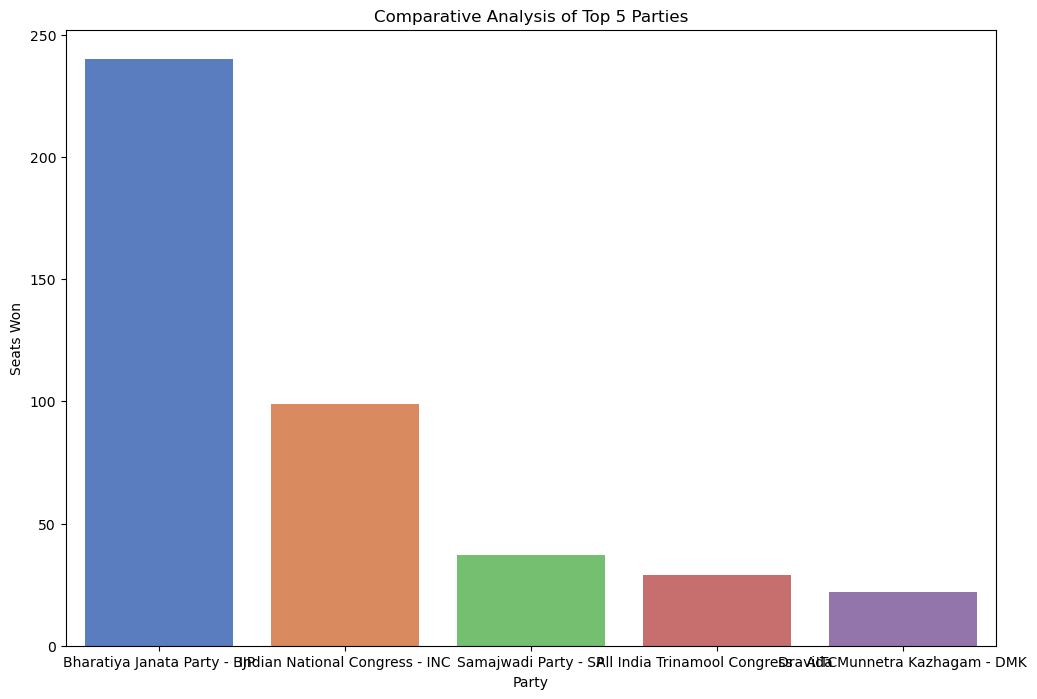

In [82]:
# Comparative Analysis of Top Parties
top_parties_comparison = df[df['Party'].isin(top_5_parties['Party'])]
plt.figure(figsize=(12, 8))
sns.barplot(x='Party', y='Won', data=top_parties_comparison, palette='muted')
plt.title('Comparative Analysis of Top 5 Parties')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.show()

In [84]:
# Median and Mode of Seats Won
median_seats_won = df['Won'].median()
mode_seats_won = df['Won'].mode()[0]
print(f"\nMedian of seats won: {median_seats_won}")
print(f"\nMode of seats won: {mode_seats_won}")


Median of seats won: 2.0

Mode of seats won: 1


In [85]:
# Seats won by each category
category_seats_won = df.groupby('Category')['Won'].sum()
print(f"\nSeats won by each category:\n{category_seats_won}")


Seats won by each category:
Category
Minor        57
Regional     59
Major       187
Dominant    240
Name: Won, dtype: int64


In [103]:
# Seats won by top 5 parties and others
top_5_and_others = df.copy()
top_5_and_others['Group'] = top_5_and_others['Party'].apply(lambda x: 'Top 5' if x in top_5_parties['Party'].values else 'Others')
seats_by_group = top_5_and_others.groupby('Group')['Won'].sum()


print("\nSeats Won by Top 5 Parties and Others:")
for group, seats_won in seats_by_group.items():
    print(f"{group}: {seats_won}")


Seats Won by Top 5 Parties and Others:
Others: 116
Top 5: 427


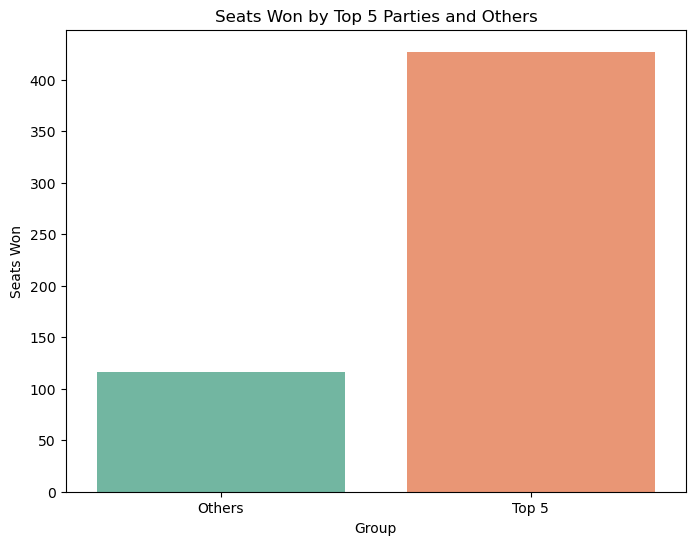

In [86]:

top_5_and_others['Group'] = top_5_and_others['Party'].apply(lambda x: 'Top 5' if x in top_5_parties['Party'].values else 'Others')
seats_by_group = top_5_and_others.groupby('Group')['Won'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=seats_by_group.index, y=seats_by_group.values, palette='Set2')
plt.title('Seats Won by Top 5 Parties and Others')
plt.xlabel('Group')
plt.ylabel('Seats Won')
plt.show()


Comparison of Seats Won vs. Seats Leading by Party:
Bharatiya Janata Party - BJP: Won 240 seats, Leading 0 seats
Indian National Congress - INC: Won 99 seats, Leading 0 seats
Samajwadi Party - SP: Won 37 seats, Leading 0 seats
All India Trinamool Congress - AITC: Won 29 seats, Leading 0 seats
Dravida Munnetra Kazhagam - DMK: Won 22 seats, Leading 0 seats
Telugu Desam - TDP: Won 16 seats, Leading 0 seats
Janata Dal  (United) - JD(U): Won 12 seats, Leading 0 seats
Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT: Won 9 seats, Leading 0 seats
Nationalist Congress Party – Sharadchandra Pawar - NCPSP: Won 8 seats, Leading 0 seats
Independent - IND: Won 7 seats, Leading 0 seats
Shiv Sena - SHS: Won 7 seats, Leading 0 seats
Lok Janshakti Party(Ram Vilas) - LJPRV: Won 5 seats, Leading 0 seats
Rashtriya Janata Dal - RJD: Won 4 seats, Leading 0 seats
Communist Party of India  (Marxist) - CPI(M): Won 4 seats, Leading 0 seats
Yuvajana Sramika Rythu Congress Party - YSRCP: Won 4 seats, Leading 0 sea

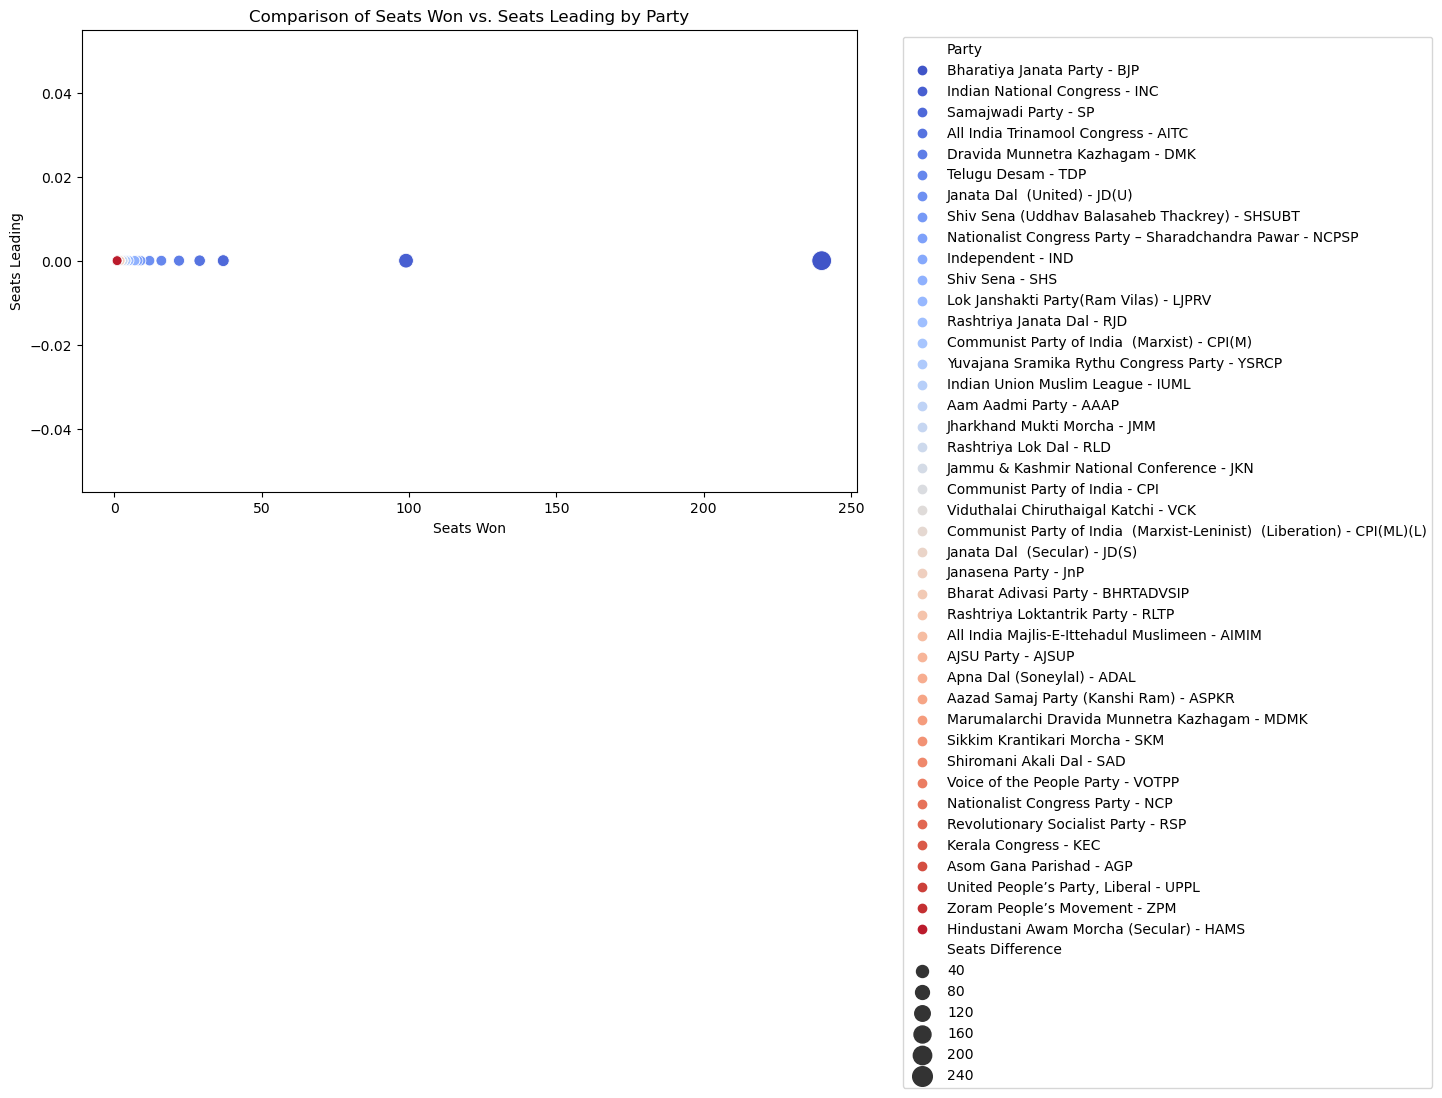

In [104]:
# Calculate difference between seats won and leading for each party
df['Seats Difference'] = df['Won'] - df['Leading']

print("\nComparison of Seats Won vs. Seats Leading by Party:")
for index, row in df.iterrows():
    print(f"{row['Party']}: Won {row['Won']} seats, Leading {row['Leading']} seats")

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Won', y='Leading', data=df, hue='Party', palette='coolwarm', size='Seats Difference', sizes=(50, 200))
plt.title('Comparison of Seats Won vs. Seats Leading by Party')
plt.xlabel('Seats Won')
plt.ylabel('Seats Leading')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Proportion of Total Seats Contested by Each Party:
Bharatiya Janata Party - BJP: 44.20% of total seats
Indian National Congress - INC: 18.23% of total seats
Samajwadi Party - SP: 6.81% of total seats
All India Trinamool Congress - AITC: 5.34% of total seats
Dravida Munnetra Kazhagam - DMK: 4.05% of total seats
Telugu Desam - TDP: 2.95% of total seats
Janata Dal  (United) - JD(U): 2.21% of total seats
Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT: 1.66% of total seats
Nationalist Congress Party – Sharadchandra Pawar - NCPSP: 1.47% of total seats
Shiv Sena - SHS: 1.29% of total seats
Independent - IND: 1.29% of total seats
Lok Janshakti Party(Ram Vilas) - LJPRV: 0.92% of total seats
Rashtriya Janata Dal - RJD: 0.74% of total seats
Communist Party of India  (Marxist) - CPI(M): 0.74% of total seats
Yuvajana Sramika Rythu Congress Party - YSRCP: 0.74% of total seats
Indian Union Muslim League - IUML: 0.55% of total seats
Aam Aadmi Party - AAAP: 0.55% of total seats
Jharkhand Mukti Morcha 

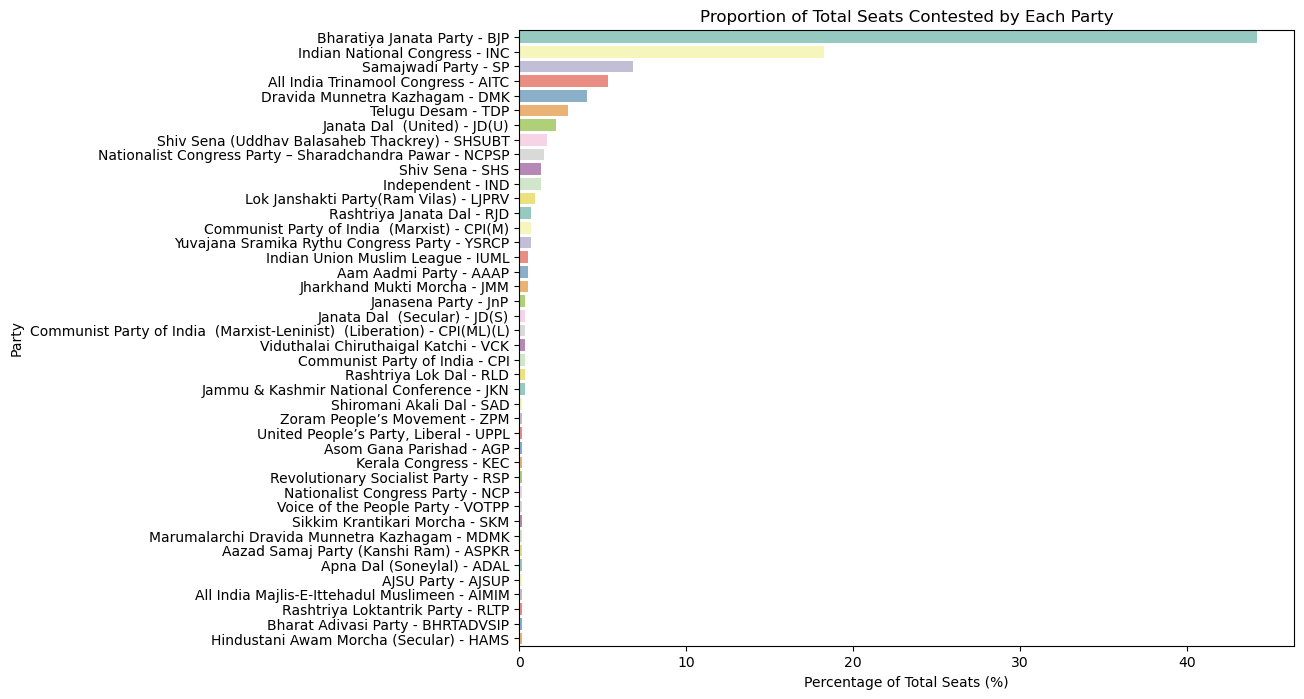

In [105]:
# Calculate percentage of total seats contested by each party
df['Percentage Total'] = (df['Total'] / df['Total'].sum()) * 100

print("\nProportion of Total Seats Contested by Each Party:")
for index, row in df.sort_values(by='Percentage Total', ascending=False).iterrows():
    print(f"{row['Party']}: {row['Percentage Total']:.2f}% of total seats")

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Percentage Total', y='Party', data=df.sort_values(by='Percentage Total', ascending=False), palette='Set3')
plt.title('Proportion of Total Seats Contested by Each Party')
plt.xlabel('Percentage of Total Seats (%)')
plt.ylabel('Party')
plt.show()